In [3]:
#import dependencies
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# Reference the rat sighting file where the CSV is located
rat_sightings_csv_path = "data/rat_sightings_nyc.csv"

# Import the data into a Pandas DataFrame
rat_sightings_df = pd.read_csv(rat_sightings_csv_path)
rat_sightings_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [5]:
#preview rat sightings columns
rat_sightings_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [6]:
# Reference the rodent inspections file where the CSV is located
rodent_inspection_csv_path = "data/rodent-inspection-nyc.csv"

# Import the data into a Pandas DataFrame
rodent_inspection_df = pd.read_csv(rodent_inspection_csv_path)
rodent_inspection_df.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,37453,PO199209,2,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-11-18T12:50:18,Bait applied,2010-11-19T08:43:21,"{'latitude': '40.779464247848', 'needs_recodin..."
1,BAIT,38432,PO199209,3,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-12-02T10:44:16,Bait applied,2010-12-07T09:34:01,"{'latitude': '40.779464247848', 'needs_recodin..."
2,BAIT,40616,PO174802,2,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2010-12-20T11:56:13,Bait applied,2010-12-28T15:16:07,"{'latitude': '40.844290674523', 'needs_recodin..."
3,BAIT,41357,PO199209,4,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2011-01-04T11:40:38,Bait applied,2011-01-06T15:04:17,"{'latitude': '40.779464247848', 'needs_recodin..."
4,BAIT,41838,PO174802,3,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2011-01-10T10:08:18,Bait applied,2011-01-10T14:49:51,"{'latitude': '40.844290674523', 'needs_recodin..."


In [7]:
#preview rodent inspection columns
rodent_inspection_df.columns

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [8]:
sights_by_borough = rat_sightings_df.groupby(['Borough'])["Unique Key"].\
    count().\
    reset_index().\
    rename(columns={"Unique Key":"Total Sightings"})
sights_by_borough.head()

,Borough,Total Sightings
0,BRONX,20706
1,BROOKLYN,34673
2,MANHATTAN,26803
3,QUEENS,14811
4,STATEN ISLAND,4920


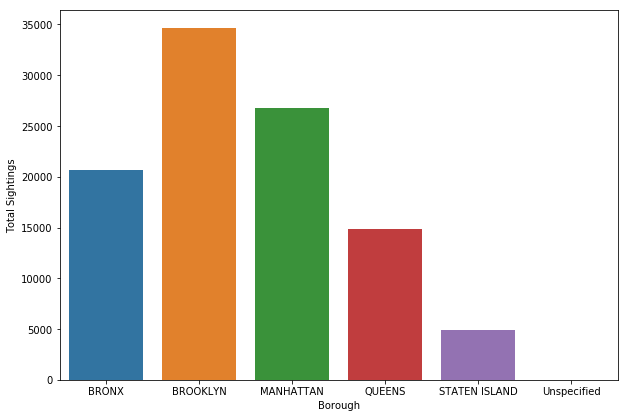

In [9]:
plt.figure(figsize=(10,6.8))
ax = sns.barplot(x="Borough", y="Total Sightings", data=sights_by_borough)

In [10]:
inspections_by_borough = rodent_inspection_df.groupby("BOROUGH")["JOB_ID"].\
    nunique().\
    reset_index().\
    rename(columns = {"JOB_ID":"Total Inspections","BOROUGH":"Borough"})
inspections_by_borough["Borough"] = inspections_by_borough["Borough"].map(lambda x: x.upper())
inspections_by_borough.head()

,Borough,Total Inspections
0,BRONX,211854
1,BROOKLYN,162388
2,MANHATTAN,352188
3,QUEENS,69925
4,STATEN ISLAND,18292


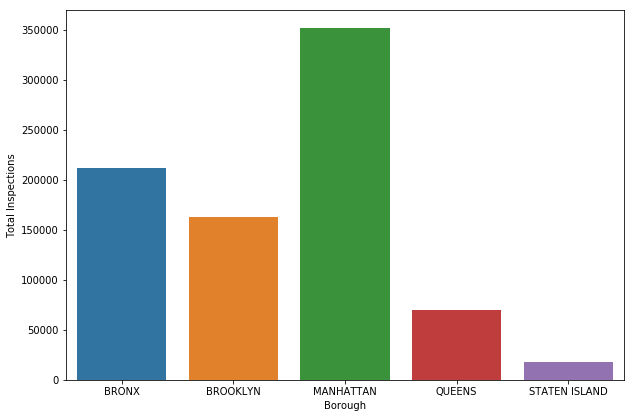

In [11]:
plt.figure(figsize=(10,6.8))
ax = sns.barplot(x="Borough", y="Total Inspections", data=inspections_by_borough)
plt.sav

In [12]:
#pd.merge(sights_by_borough,inspections_by_borough,how="left",on = "Borough")
total_inspections_sightings = pd.merge(sights_by_borough,inspections_by_borough,how="left",on = "Borough")

In [13]:
#pd.melt(total_inspections_sightings, id_vars=['Borough'], value_vars=['Total Sightings', 'Total Inspections'])
pivot_table_sightings_inspections= pd.melt(total_inspections_sightings, id_vars=['Borough'], value_vars=['Total Sightings', 'Total Inspections'])

In [14]:
pivot_table_sightings_inspections.columns

Index(['Borough', 'variable', 'value'], dtype='object')

<function matplotlib.pyplot.savefig(*args, **kwargs)>

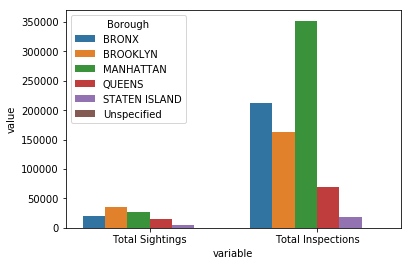

In [37]:
sns.barplot(x="variable", y="value", hue="Borough", data=pivot_table_sightings_inspections)
plt.savefig

In [16]:
# Reference the restuarant inspection file where the CSV is located
restuarant_inspection_csv_path = "data/NYC_Restuarant_inspection_Results.csv"

# Import the data into a Pandas DataFrame
restuarant_inspections_df = pd.read_csv(restuarant_inspection_csv_path)
restuarant_inspections_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,6/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,8/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,8/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/3/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,8/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,5/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,8/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,3/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,8/28/2017,Cycle Inspection / Initial Inspection


In [17]:
#preview restuarant inspections columns
restuarant_inspections_df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [18]:
df = restuarant_inspections_df

In [19]:
#print(df.loc[df['VIOLATION CODE'] == '04L'])

In [20]:
#print(df.loc[df['VIOLATION CODE'] == '04L']) & (df['CUISINE DESCRIPTION'])

In [21]:
cuisine_description_df = (df.loc[df['VIOLATION CODE'] == '04L'])

In [22]:
cuisine_description_df.drop(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE', 'ACTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'], axis=1)

,CUISINE DESCRIPTION,VIOLATION CODE,VIOLATION DESCRIPTION
49,Chinese,04L,Evidence of mice or live mice present in facil...
87,Italian,04L,Evidence of mice or live mice present in facil...
120,Chinese,04L,Evidence of mice or live mice present in facil...
139,American,04L,Evidence of mice or live mice present in facil...
150,Chinese,04L,Evidence of mice or live mice present in facil...
151,Japanese,04L,Evidence of mice or live mice present in facil...
154,Pizza,04L,Evidence of mice or live mice present in facil...
201,Thai,04L,Evidence of mice or live mice present in facil...
218,"Ice Cream, Gelato, Yogurt, Ices",04L,Evidence of mice or live mice present in facil...
233,Pizza,04L,Evidence of mice or live mice present in facil...


In [23]:
cuisine_description_df.drop(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE', 'ACTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'VIOLATION DESCRIPTION','INSPECTION TYPE'], axis=1)

,CUISINE DESCRIPTION,VIOLATION CODE
49,Chinese,04L
87,Italian,04L
120,Chinese,04L
139,American,04L
150,Chinese,04L
151,Japanese,04L
154,Pizza,04L
201,Thai,04L
218,"Ice Cream, Gelato, Yogurt, Ices",04L
233,Pizza,04L


In [24]:
cuisine_description_revised = cuisine_description_df.drop(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE', 'ACTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'VIOLATION DESCRIPTION','INSPECTION TYPE'], axis=1)

In [25]:
cuisine_description_revised.groupby(["CUISINE DESCRIPTION","VIOLATION CODE"]).size()

CUISINE DESCRIPTION                                      VIOLATION CODE
Afghan                                                   04L                 22
African                                                  04L                110
American                                                 04L               5602
Armenian                                                 04L                 28
Asian                                                    04L                401
Australian                                               04L                 22
Bagels/Pretzels                                          04L                198
Bakery                                                   04L                989
Bangladeshi                                              04L                 65
Barbecue                                                 04L                 39
Bottled beverages, including water, sodas, juices, etc.  04L                 96
Brazilian                                       

In [26]:
cusine_description_top_ten_df =cuisine_description_revised.groupby(["CUISINE DESCRIPTION","VIOLATION CODE"]).size()

In [41]:
cusine_description_top_ten_df.sort_values(ascending=False).head()

CUISINE DESCRIPTION                                               VIOLATION CODE
American                                                          04L               5602
Chinese                                                           04L               3263
Pizza                                                             04L               1648
Caribbean                                                         04L               1307
Latin (Cuban, Dominican, Puerto Rican, South & Central American)  04L               1231
Italian                                                           04L               1181
Japanese                                                          04L               1109
Bakery                                                            04L                989
Mexican                                                           04L                979
CafÃ©/Coffee/Tea                                                  04L                861
dtype: int64

In [47]:
# Labels for the sections of our pie chart
labels = ["American", "Chinese", "Pizza", "Caribbean", "Latin", "Japenese"]

# The values of each section of the pie chart
sizes = [5602, 3263, 1648, 1307, 1231, 1181]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue", "violet"]



([<matplotlib.patches.Wedge at 0x1fda39e8320>,
 [Text(-0.94434822368332, -0.5640978925914881, 'American'),
  Text(0.8781774931020887, -0.6624230450466916, 'Chinese'),
  Text(0.9962533450030951, 0.46634672998761784, 'Pizza'),
  Text(0.5086412452218018, 0.9753379330566484, 'Caribbean'),
  Text(-0.08740234595175067, 1.09652215204351, 'Latin'),
  Text(-0.63192821352468, 0.9003703310035859, 'Japenese')],
 [Text(-0.5150990310999927, -0.30768975959535716, '39.4%'),
  Text(0.479005905328412, -0.361321660934559, '22.9%'),
  Text(0.5434109154562337, 0.2543709436296097, '11.6%'),
  Text(0.27744067921189186, 0.53200250893999, '9.2%'),
  Text(-0.04767400688277309, 0.5981029920237327, '8.6%'),
  Text(-0.34468811646800723, 0.4911110896383195, '8.3%')])

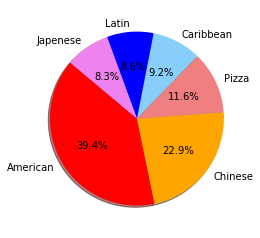

In [48]:
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)